# Human Climate Horizon

### Background
The human climate horizon dataset was taken from [here](https://horizons.hdr.undp.org/?_gl=1*x8xk00*_ga*MzIyMzg3MDI4LjE2OTMzNjkxMjQ.*_ga_3W7LPK0WP1*MTY5MzM2OTEyNC4xLjEuMTY5MzM2OTkxMS4yOS4wLjA.#/), a dataset provided by [Human Development Reports](https://hdr.undp.org).

A short prompt about the data set from the author: 
> ***WHAT IS HUMAN CLIMATE HORIZONS?*** Human Climate Horizons (HCH) is a data and insights platform providing localized information on future impacts of climate change across several dimensions of human development and human security. It is open access and scalable digital public good – a window to possible futures – fed by an evolving stream of multidisciplinary frontier research. It is the result of joint work of the Climate Impact Lab and the UNDP’s Human Development Report Office.

### Dataset
More specifics about the dataset can be found on the webpage.

### Goal
The goal of this notebook is to introduce how to use the dataset and introduce some possibilities of what we can do with the dataset.

## 01 Data Exploration
Let's take a look at the data.

In [21]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

Let's take a look at temperature data at the geographical level of country. The dataset is located in /`human_climate_horizons/hazard_data/hazards_temp_countries`. The csv we will first look at is titled `global_tas-annual_rcp45_1986-2005_absolute_degF_percentiles-national.csv`, which tracks the average daily mean temperature from 1986 to 2005. It shows the value in degrees Fareignheit, and its 0.05, 0.5 and 0.95 percentile.

In [22]:
root_data_folder = "Data"
# Hazard/Temp Data
hazard_folder = root_data_folder + "/human_climate_horizons/hazard_data/"
countries_folder = hazard_folder + "hazards_temp_countries"
# Look at all the files in the folder
files = os.listdir(countries_folder)
files = sorted(files)
print(files)

# Take a look at the first file
print("File Name:", files[0])
df = pd.read_csv(countries_folder + "/" + files[0])
df.head()

['global_tas-annual_rcp45_1986-2005_absolute_degF_percentiles-national.csv', 'global_tas-annual_rcp45_2020-2039_absolute_degF_percentiles-national.csv', 'global_tas-annual_rcp45_2040-2059_absolute_degF_percentiles-national.csv', 'global_tas-annual_rcp45_2080-2099_absolute_degF_percentiles-national.csv', 'global_tas-annual_rcp85_2020-2039_absolute_degF_percentiles-national.csv', 'global_tas-annual_rcp85_2040-2059_absolute_degF_percentiles-national.csv', 'global_tas-annual_rcp85_2080-2099_absolute_degF_percentiles-national.csv', 'global_tas-seasonal_DJF_rcp45_2020-2039_absolute_degF_percentiles-national.csv', 'global_tas-seasonal_DJF_rcp45_2040-2059_absolute_degF_percentiles-national.csv', 'global_tas-seasonal_DJF_rcp45_2080-2099_absolute_degF_percentiles-national.csv', 'global_tas-seasonal_DJF_rcp85_2020-2039_absolute_degF_percentiles-national.csv', 'global_tas-seasonal_DJF_rcp85_2040-2059_absolute_degF_percentiles-national.csv', 'global_tas-seasonal_DJF_rcp85_2080-2099_absolute_degF_pe

,ISO,0.05,0.5,0.95
0,ABW,79.976913,80.204202,80.759862
1,AFG,54.253081,54.625040,54.985285
2,AGO,72.369286,72.613500,72.976110
3,AIA,77.996626,78.246511,78.542437
4,ALA,40.748224,41.535804,42.410252


What are the ISO codes? Let's merge the data from the `hazard_data/ISOcodes_CIL.csv` file.

In [23]:
isocodes = pd.read_csv("{}/ISOcodes_CIL.csv".format(hazard_folder))
isocodes.head()

,ISO,Countryname
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands


In [24]:
# merge
df = df.merge(isocodes, left_on="ISO", right_on="ISO", how="left")
df.head()

,ISO,0.05,0.5,0.95,Countryname
0,ABW,79.976913,80.204202,80.759862,Aruba
1,AFG,54.253081,54.625040,54.985285,Afghanistan
2,AGO,72.369286,72.613500,72.976110,Angola
3,AIA,77.996626,78.246511,78.542437,Anguilla
4,ALA,40.748224,41.535804,42.410252,Åland Islands


In [25]:
def plot_map(df, column, title):
    print("Load world map data")
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    
    print("Merge world map data with hazard data")
    merged_data = world.merge(df, left_on="iso_a3", right_on="ISO", how="left")
    
     # Plot the world map
    fig, ax = plt.subplots(1, 1, figsize=(40, 20))
    world.boundary.plot(ax=ax)
    merged_data.plot(ax=ax, column=column, cmap='Reds', legend=True, legend_kwds={'label': column})

    # Annotate each country with total COVID-19 cases
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[column]):
        ax.text(x, y, label, fontsize=8, ha='center')

    ax.set_title(title)
    plt.show()

Load world map data
Merge world map data with hazard data


<ipython-input-25-b836a4c2fdf2>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-25-b836a4c2fdf2>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data[column]):


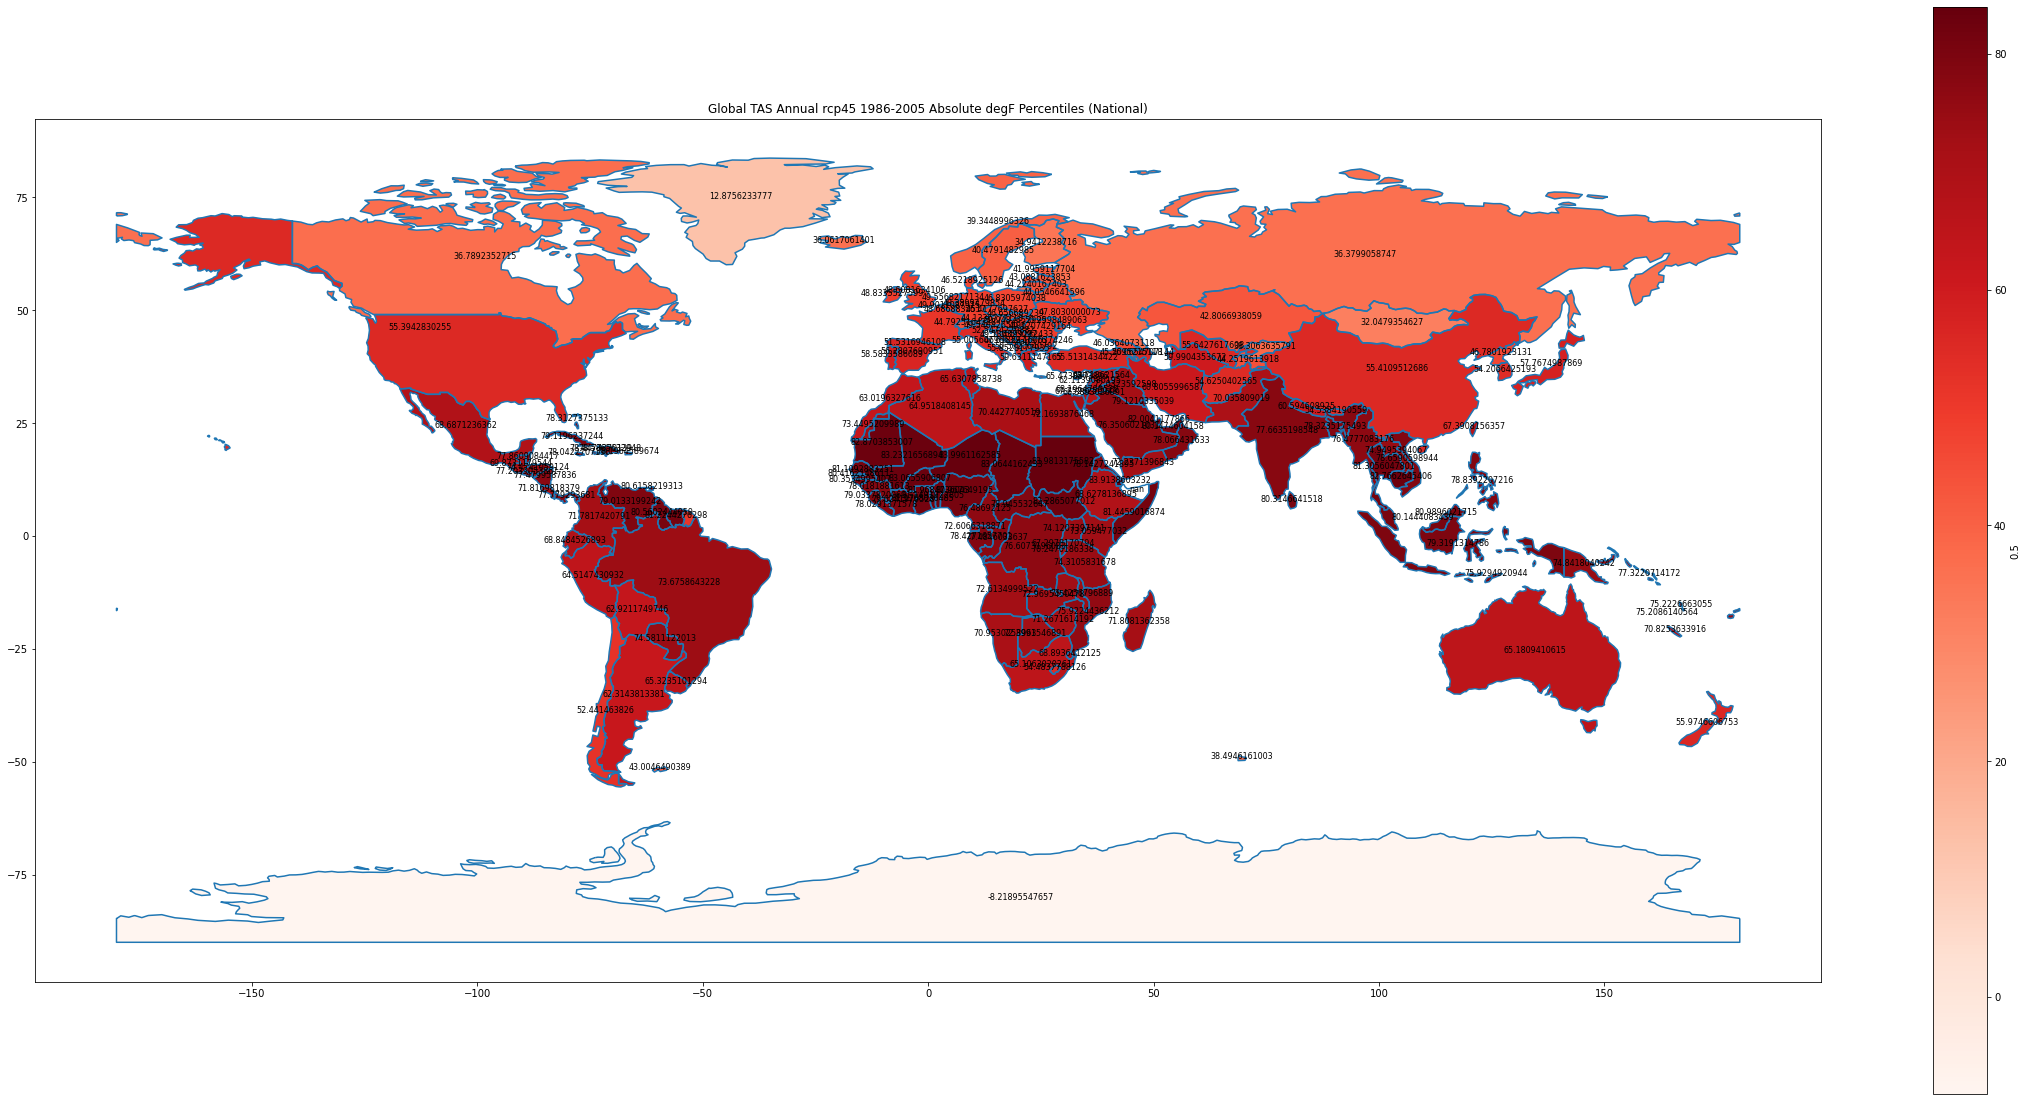

In [26]:
plot_map(df, "0.5", "Global TAS Annual rcp45 1986-2005 Absolute degF Percentiles (National)")

Next let's take a simple look at the hazard data.

In [27]:
# Impact Data
impact_folder = "Data/human_climate_horizons/impact_data/"
country_level_folder = impact_folder + "impacts_country_level"
regions_level_folder = impact_folder + "impacts_regions"
# Look at all the files in the folder
files = os.listdir(country_level_folder)
files = sorted(files)
print(files)

print("File Name:", files[0])
df = pd.read_csv(country_level_folder + "/" + files[0])
df.head()

['unit_change_in_deathrate_geography_country_level_years_averaged_rcp45_SSP3_quantiles_mean.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp45_SSP3_quantiles_q5.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp45_SSP3_quantiles_q50.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp45_SSP3_quantiles_q95.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp85_SSP3_quantiles_mean.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp85_SSP3_quantiles_q5.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp85_SSP3_quantiles_q50.csv', 'unit_change_in_deathrate_geography_country_level_years_averaged_rcp85_SSP3_quantiles_q95.csv', 'unit_electricity_impacts_gj_geography_country_level_years_averaged_rcp45_SSP3_quantiles_mean.csv', 'unit_electricity_impacts_gj_geography_country_level_years_averaged_rcp45_SSP3_quantiles_q5.csv', 'unit_electricity_impacts_gj_geog

,ISO_code,years_2020_2039,years_2040_2059,years_2080_2099
0,ABW,4.589684,4.605087,3.668278
1,AFG,-2.531005,-2.753577,-0.637083
2,AGO,-2.781905,-4.152195,-6.061456
3,AIA,0.760501,0.652555,2.013484
4,ALA,-17.848752,-44.050702,-87.984156


Hope this was a good introduction to this dataset. Leave any suggestions about what we can do with this dataset!